# Exploring Dandiset 001359: Patch-seq Electrophysiology of Human Brain Cells

*Notebook generated with the assistance of AI. Please exercise caution when interpreting the code or the results presented below, and always cross-reference with primary data and documentation before drawing scientific conclusions.*

[Dandiset 001359 on DANDI Archive](https://dandiarchive.org/dandiset/001359/0.250401.1603)

## Overview

This notebook provides an initial exploration of Dandiset 001359 ("20250331_AIBS_Patchseq_human"), an open-access resource for multimodal human brain cell type classification using Patch-seq. The Dandiset contains NWB files with patch-clamp recordings, stimulus information, extracted spike data, and associated metadata.

**Key features:**
- Patch-seq electrophysiology recordings from human brain tissue
- NWB format (Neurodata Without Borders)
- Data includes raw and processed time series, stimuli, spike detections, sweep-level metadata, and subject/device info

**What this notebook covers:**
1. Listing assets in the Dandiset
2. Loading remote NWB files for inspection/analysis (without local download)
3. Exploring the file structure (acquisition, stimulus, processing, metadata)
4. Plotting an example acquisition sweep and its stimulus
5. Visualizing spike detection results (and addressing time alignment issues)
6. Understanding sweep mapping and metadata

**Requirements:**
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `numpy`
- `matplotlib`
- `pandas`

(All required packages are assumed installed.)

## 1. List and Browse NWB Files in the Dandiset

We'll use the DANDI API to explore the available NWB files in Dandiset 001359.

In [1]:
from dandi.dandiapi import DandiAPIClient

dandiset_id = "001359"
dandiset_version = "0.250401.1603"

with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    # List first 10 NWB files
    nwb_assets = list(dandiset.get_assets_by_glob("*.nwb"))
    nwb_paths = [asset.path for asset in nwb_assets]
    print("First 10 NWB files in the Dandiset:")
    for path in nwb_paths[:10]:
        print("-", path)

First 10 NWB files in the Dandiset:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213430531_icephys.nwb
- sub-1211237280/sub-1211237280_ses-1211340847_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213420947_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213591749_icephys.nwb
- sub-1213383385/sub-1213383385_ses-1213661643_icephys.nwb


## 2. Load a Remote NWB File for Exploration

We will interactively load an NWB file (streamed from DANDI, not downloaded) for inspection. This approach allows users to examine even large datasets without using much local disk space.

For demonstration, we'll use the file:
```
sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
```

In [2]:
import h5py
import remfile
import pynwb

# Select NWB file path for analysis
nwb_path = "sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb"

# Get the remote streaming URL via DANDI API
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    asset = next(dandiset.get_assets_by_glob(nwb_path))
    url = asset.download_url

# Stream the NWB file for reading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()
print(f"Loaded NWB file: {nwb_path}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB file: sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb


## 3. Explore File Structure: Major Groups and Metadata

We'll explore the structure of the loaded NWB file to understand what data and metadata are available.

In [3]:
print("Available 'acquisition' objects (sweeps):")
for key in nwbfile.acquisition:
    print(" ", key)
    
print("\nAvailable 'stimulus' objects:")
for key in nwbfile.stimulus:
    print(" ", key)

print("\nProcessing modules:")
for mod in nwbfile.processing:
    print(" ", mod)
    for iface in nwbfile.processing[mod].data_interfaces:
        print("   -", iface)

print("\nSweep table columns:", nwbfile.sweep_table.colnames)
print("Number of sweeps:", len(nwbfile.sweep_table.id))

print("\nSubject info:")
print(vars(nwbfile.subject))

Available 'acquisition' objects (sweeps):
  data_00000_AD0
  data_00001_AD0
  data_00002_AD0
  data_00003_AD0
  data_00004_AD0
  data_00005_AD0
  data_00006_AD0
  data_00007_AD0
  data_00008_AD0
  data_00009_AD0
  data_00010_AD0
  data_00011_AD0
  data_00012_AD0
  data_00013_AD0
  data_00014_AD0
  data_00015_AD0
  data_00016_AD0
  data_00017_AD0
  data_00018_AD0
  data_00019_AD0
  data_00020_AD0
  data_00021_AD0
  data_00022_AD0
  data_00023_AD0
  data_00024_AD0
  data_00025_AD0
  data_00026_AD0
  data_00027_AD0
  data_00028_AD0
  data_00029_AD0
  data_00030_AD0
  data_00031_AD0
  data_00032_AD0
  data_00033_AD0
  data_00034_AD0
  data_00035_AD0
  data_00036_AD0
  data_00037_AD0
  data_00038_AD0
  data_00039_AD0
  data_00040_AD0
  data_00041_AD0
  data_00042_AD0
  data_00043_AD0
  data_00044_AD0
  data_00045_AD0
  data_00046_AD0
  data_00047_AD0
  data_00048_AD0
  data_00049_AD0
  data_00050_AD0
  data_00051_AD0
  data_00052_AD0
  data_00053_AD0
  data_00054_AD0
  data_00055_AD0
  data

## 4. Visualize an Example Raw Acquisition Sweep and Corresponding Stimulus

We'll plot the voltage-clamp current trace and the aligned stimulus waveform for a given sweep. This helps to understand how responses relate to the experimental protocol.

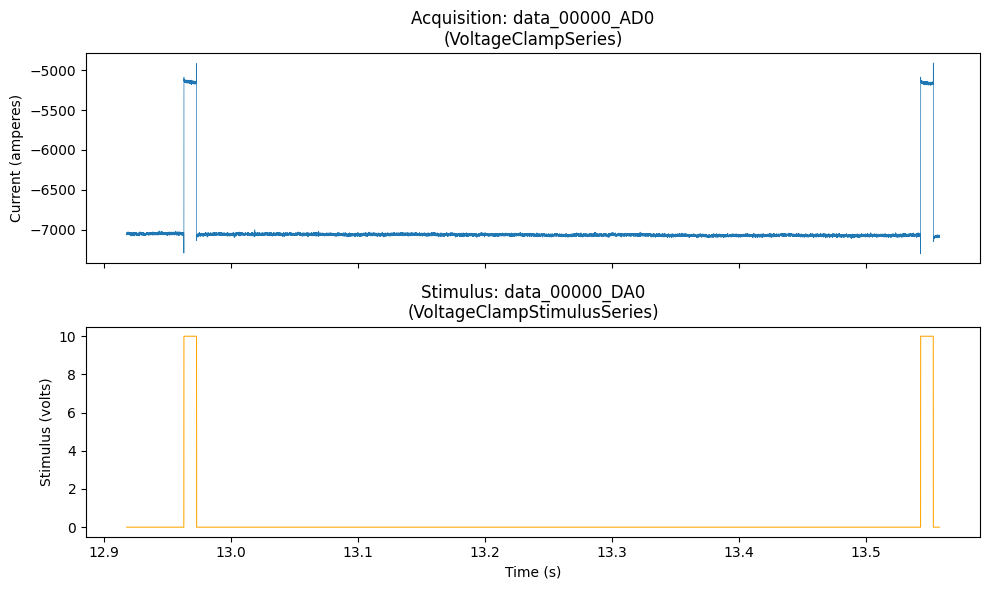

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Choose example sweep (first in list)
acq_key = list(nwbfile.acquisition.keys())[0]
stim_key = acq_key.replace("AD0", "DA0")  # assumes naming convention

acq = nwbfile.acquisition[acq_key]
stim = nwbfile.stimulus[stim_key]

# Time axes
acq_data = acq.data[:]
acq_time = acq.starting_time + (1/acq.rate) * np.arange(acq_data.shape[0])
stim_data = stim.data[:]
stim_time = stim.starting_time + (1/stim.rate) * np.arange(stim_data.shape[0])

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axs[0].plot(acq_time, acq_data, lw=0.5)
axs[0].set_ylabel(f"Current ({acq.unit})")
axs[0].set_title(f"Acquisition: {acq_key}\n({type(acq).__name__})")
axs[1].plot(stim_time, stim_data, lw=0.75, color='orange')
axs[1].set_ylabel(f"Stimulus ({stim.unit})")
axs[1].set_title(f"Stimulus: {stim_key}\n({type(stim).__name__})")
axs[1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()

## 5. Inspect Processed Data: Spike Detection

This NWB file contains a "spikes" processing module with detected spike times for certain sweeps. We'll list which sweeps contain spikes and visualize their alignment with the acquisition trace.

Spike TimeSeries with spikes detected (sweep/interface):
  Sweep_19: 12 spikes
  Sweep_24: 30 spikes
  Sweep_25: 34 spikes
  Sweep_26: 37 spikes
  Sweep_27: 42 spikes
  Sweep_28: 46 spikes
  Sweep_29: 49 spikes
  Sweep_30: 49 spikes
  Sweep_31: 49 spikes
  Sweep_33: 52 spikes
  Sweep_45: 1 spikes
  Sweep_47: 10 spikes
  Sweep_48: 10 spikes
  Sweep_50: 10 spikes

Using sweep/interface: Sweep_19


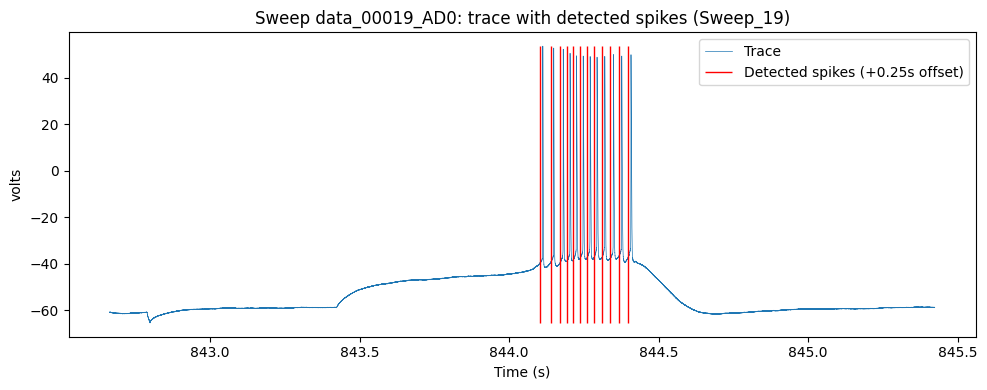

In [5]:
# Find sweeps with spikes
spikes_mod = nwbfile.processing["spikes"]
print("Spike TimeSeries with spikes detected (sweep/interface):")
with_spikes = []
for iface_name, iface in spikes_mod.data_interfaces.items():
    count = len(iface.data[:])
    if count > 0:
        print(f"  {iface_name}: {count} spikes")
        with_spikes.append(iface_name)

# Choose an example sweep with spikes
spike_iface = with_spikes[0]
print(f"\nUsing sweep/interface: {spike_iface}")

# Map to acquisition sweep
candidate_num = ''.join(filter(str.isdigit, spike_iface))
acq_sweep = f"data_{int(candidate_num):05d}_AD0"
acq = nwbfile.acquisition[acq_sweep]
acq_data = acq.data[:]
acq_time = acq.starting_time + (1/acq.rate) * np.arange(acq_data.shape[0])

# Spike times: relative to sweep start; often, a small offset is needed for correct alignment (+0.25s here).
spike_ts = spikes_mod.data_interfaces[spike_iface]
spike_times_rel = spike_ts.data[:] + 0.25
spike_times_abs = spike_times_rel + acq.starting_time

# Handle nans for y-limits
ymin, ymax = np.nanmin(acq_data), np.nanmax(acq_data)
in_range = (spike_times_abs >= acq_time[0]) & (spike_times_abs <= acq_time[-1])

plt.figure(figsize=(10, 4))
plt.plot(acq_time, acq_data, lw=0.5, label='Trace')
plt.vlines(spike_times_abs[in_range], ymin, ymax, colors='r', linewidth=1, label='Detected spikes (+0.25s offset)')
plt.title(f"Sweep {acq_sweep}: trace with detected spikes ({spike_iface})")
plt.xlabel("Time (s)")
plt.ylabel(acq.unit)
plt.legend()
plt.tight_layout()
plt.show()

## 6. Understanding Sweep Metadata and Series Mapping

Each sweep is associated with one or more PatchClampSeries (data or stimulus). We'll demonstrate how to map between sweep numbers and data series names using the NWB `sweep_table`.

In [6]:
tab = nwbfile.sweep_table.to_dataframe()
print("First 5 entries in sweep_table:")
print(tab.head())

# Mapping: sweep number → series name(s)
def get_series_names(series_refs):
    names = []
    for ref in series_refs:
        try:
            names.append(ref.name)
        except Exception:
            pass
    return names

print("\nMapping: sweep number to PatchClampSeries/StimulusSeries name(s)")
for idx, row in tab.head(5).iterrows():
    print(f"Sweep {row['sweep_number']}: {get_series_names(row['series'])}")

# Example: which sweep contains a specific acquisition series
name_to_find = 'data_00000_AD0'
for idx, row in tab.iterrows():
    if name_to_find in get_series_names(row['series']):
        print(f"\nPatchClampSeries '{name_to_find}' is in sweep number: {row['sweep_number']}")

First 5 entries in sweep_table:
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2

Mapping: sweep number to PatchClampSeries/StimulusSeries name(s)
Sweep 0: ['data_00000_AD0']
Sweep 0: ['data_00000_DA0']
Sweep 1: ['data_00001_AD0']
Sweep 1: ['data_00001_DA0']
Sweep 2: ['data_00002_AD0']

PatchClampSeries 'data_00000_AD0' is in sweep number: 0


## 7. Summary

- NWB files in this Dandiset contain rich multimodal measurements centered on electrophysiology.
- We've shown how to browse the Dandiset, remotely load and explore NWB files, and visualize stimulus-response relationships and detected spikes.
- Handling of spike time alignment is critical for accurate analysis.
- Sweep metadata provide robust data management and cross-referencing for larger analyses.

**Next steps:** Users could further explore different sweep types, perform more detailed spike/feature analysis, or incorporate external transcriptomic/morphological data if/when available.

*End of notebook. For further questions, consult the [DANDI Dandiset Page](https://dandiarchive.org/dandiset/001359/0.250401.1603) or primary documentation for guidance on deeper analyses.*